In [ ]:
#Assignment 5 (Name- Deepesh, Registration Number- 21BCE3055)

In [37]:
#Task 1 - Understand the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [39]:
#Task 2 - Data Preprocessing

df.shape

(200, 5)

In [40]:
df.isnull().any() #There is no null values in the dataset

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [41]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [42]:
df.describe() #Descriptive Statistics

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


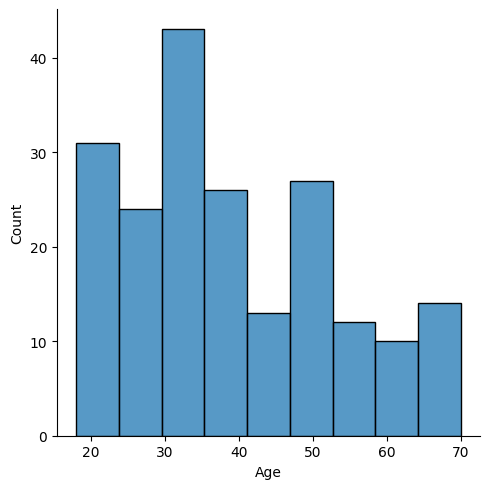

In [43]:
#Univariate Analysis
sns.displot(df.Age)

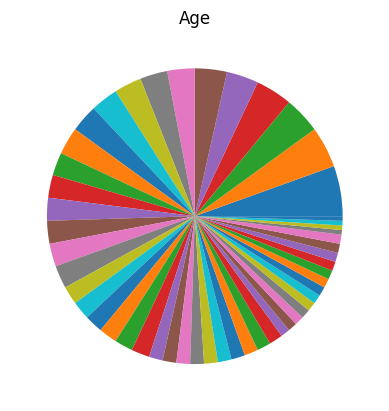

In [44]:
plt.pie(df.Age.value_counts())
plt.title('Age')
plt.show()

<Axes: xlabel='Age', ylabel='Gender'>

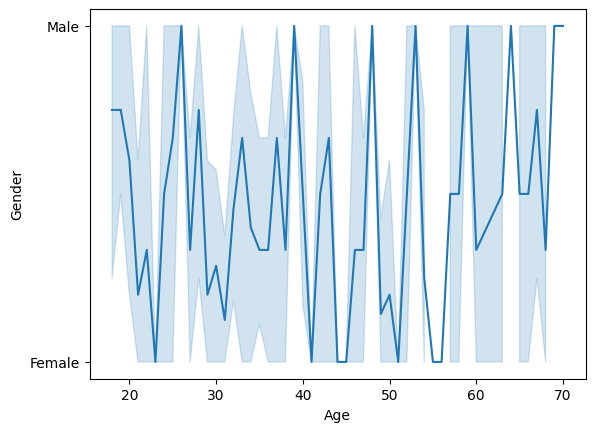

In [45]:
#Bi-Variate Analysis

sns.lineplot(x = df.Age,y=df.Gender)

<Axes: xlabel='Age', ylabel='Gender'>

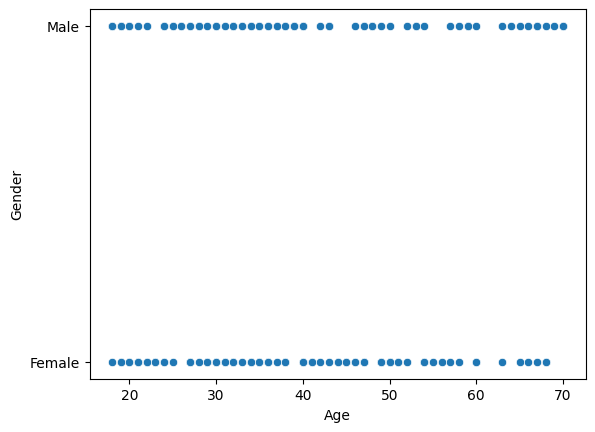

In [46]:
sns.scatterplot(x = df.Age,y=df.Gender)

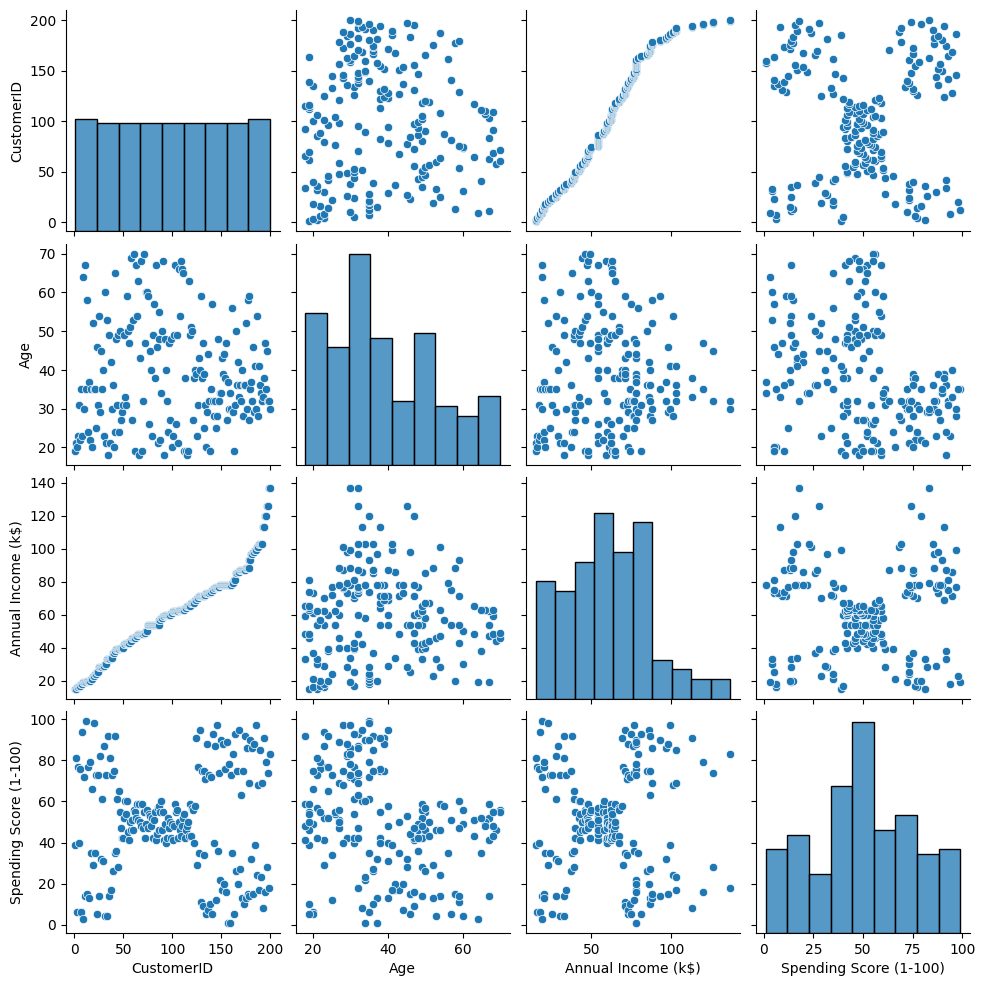

In [47]:
#Multivariate Analysis

sns.pairplot(df)

<ipython-input-48-e2e2f0d64bbd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

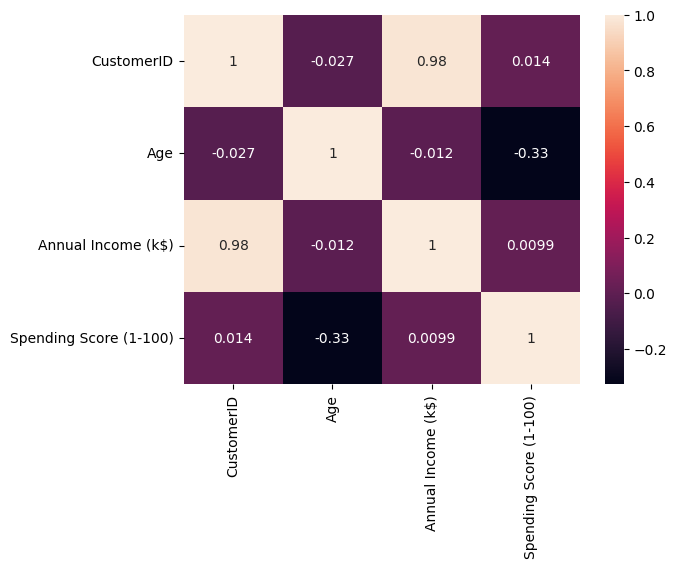

In [48]:
#Correlation Heatmap

sns.heatmap(df.corr(),annot=True)

In [49]:
#Task 3 - Machine Learning approach with clustering algorithm

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
df.Gender = le.fit_transform(df.Gender)

In [51]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [52]:
X = df.iloc[:,:-1]
X.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17


In [53]:
X.tail()

,CustomerID,Gender,Age,Annual Income (k$)
195,196,0,35,120
196,197,0,45,126
197,198,1,32,126
198,199,1,32,137
199,200,1,30,137


In [54]:
y =df.Age
y.head()

0    19
1    21
2    20
3    23
4    31
Name: Age, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 47)

In [56]:
y_train.shape

(140,)

In [57]:
y_test.shape

(60,)

In [58]:
y_train.value_counts()

49    7
31    7
35    7
32    7
19    5
29    4
23    4
48    4
40    4
34    4
36    4
30    4
50    4
20    4
27    3
21    3
37    3
59    3
38    3
18    3
60    3
28    3
47    3
41    2
26    2
24    2
51    2
39    2
57    2
70    2
43    2
58    2
52    2
63    2
68    2
44    2
45    2
46    2
54    2
25    2
33    1
22    1
53    1
55    1
65    1
66    1
56    1
69    1
67    1
64    1
Name: Age, dtype: int64

In [59]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [60]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [61]:
y_pred = model.predict(x_test)

In [62]:
y_pred_train  = model.predict(x_train)

In [63]:
from sklearn.metrics import accuracy_score,classification_report

In [64]:
accuracy_score(y_test,y_pred)

0.08333333333333333

In [65]:
accuracy_score(y_train,y_pred_train)

0.2857142857142857

In [66]:
pd.crosstab(y_test,y_pred)

col_0,18,19,20,21,23,26,28,29,31,32,...,41,43,45,47,48,49,52,54,60,70
Age,,,,,,,,,,,,,,,,,,,,,
18,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          18       0.00      0.00      0.00         1
          19       1.00      0.33      0.50         3
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         3
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         3
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         4
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         1
          35       0.33    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.